In [1]:
import pandas as pd

import plotly.graph_objs as go
import chart_studio.plotly as py
import cufflinks
import plotly.express as px
import plotly.figure_factory as ff
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

from plotly.offline import iplot
cufflinks.go_offline()
cufflinks.set_config_file(world_readable=True, theme='pearl')

from matplotlib.pyplot import figure
from seaborn import pairplot, barplot
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error

#### Basket rate’s behavior over the time, its trend

In [2]:
rates_zodiac = pd.read_csv("D:/rate_zodiac.csv")

In [3]:
rates_zodiac['sign'] = rates_zodiac['sign'].astype('category')
rates_zodiac['sign_code'] = rates_zodiac['sign'].cat.codes

In [4]:
rates_zodiac

date         sign  usd_norm  eur_norm  rub_norm  basket_rate  \
0     2001-01-01  Capricornus    0.1180  0.109663  0.004197     0.021930   
1     2001-01-02  Capricornus    0.1180  0.109663  0.004197     0.021930   
2     2001-01-03  Capricornus    0.1180  0.109640  0.004197     0.021929   
3     2001-01-04  Capricornus    0.1180  0.109640  0.004197     0.021929   
4     2001-01-05  Capricornus    0.1180  0.111716  0.004143     0.021870   
...          ...          ...       ...       ...       ...          ...   
7413  2021-04-19        Aries    2.5965  3.108200  0.034400     0.309811   
7414  2021-04-20       Taurus    2.5960  3.114000  0.034100     0.308555   
7415  2021-04-21       Taurus    2.5864  3.118600  0.034000     0.307851   
7416  2021-04-22       Taurus    2.5980  3.120900  0.033800     0.307402   
7417  2021-04-23       Taurus    2.5947  3.125300  0.034000     0.308279   

      sign_code  
0             3  
1             3  
2             3  
3             3  
4             3  
...         ...  
7413          1  
7414         10  
7415         10  
7416         10  
7417         10  

[7418 rows x 7 columns]

In [5]:
rates_zodiac.iplot(x='date',
                y='basket_rate',
                mode='markers+lines',
                hline=[dict(y=i, color=j, dash='dash', width=1) for i, j in [(rates_zodiac['basket_rate'].quantile(0.05), 'blue'),
                                                                              (rates_zodiac['basket_rate'].quantile(0.5), 'blue'),
                                                                              (rates_zodiac['basket_rate'].quantile(0.95), 'blue'),
                                                                              (0.3, 'red')]],
                opacity=0.8,
                fontsize=8,
                size=8,
                symbol=1,
                xTitle='Date',
                yTitle='Basket rate',
                title='Currensy Basket Rate Over Time w Quantiles')

#### Autocorrelation check (seasoning)

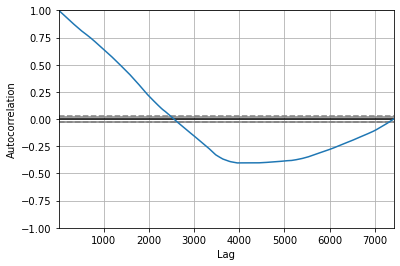

In [6]:
pd.plotting.autocorrelation_plot(rates_zodiac['basket_rate']);

#### Basket rate’s behavior over time and zodiac signs

In [7]:
data = [
    go.Scatter(
        x=rates_zodiac['date'],
        y=rates_zodiac['basket_rate'],
        text=rates_zodiac['sign'],
        mode='markers+lines',
        marker=dict(
            sizemin=10,
            colorscale='Rainbow',
            showscale=True,
            color=rates_zodiac['sign_code'],
            ))
]

figure = go.Figure(
    data=data,
    layout=go.Layout(
        xaxis=dict(title='Date'),
        yaxis=dict(title='Basket rate'),
        title='Currensy Basket Rate Over Time w Zodiac Signs'
    ))
figure

#### Basket rate’s behavior over time and moon phase

In [9]:
rates_moon = pd.read_csv("D:/rates_moon.csv")

In [10]:
rates_moon['phase'] = rates_moon['phase'].astype('category')
rates_moon['phase_code'] = rates_moon['phase'].cat.codes

In [11]:
rates_moon

date            phase  usd_norm  eur_norm  rub_norm  basket_rate  \
0     2001-01-01  Waxing_crescent    0.1180  0.109663  0.004197     0.021930   
1     2001-01-02   Waxing_gibbous    0.1180  0.109663  0.004197     0.021930   
2     2001-01-03   Waxing_gibbous    0.1180  0.109640  0.004197     0.021929   
3     2001-01-04   Waxing_gibbous    0.1180  0.109640  0.004197     0.021929   
4     2001-01-05   Waxing_gibbous    0.1180  0.111716  0.004143     0.021870   
...          ...              ...       ...       ...       ...          ...   
7413  2021-04-19   Waxing_gibbous    2.5965  3.108200  0.034400     0.309811   
7414  2021-04-20   Waxing_gibbous    2.5960  3.114000  0.034100     0.308555   
7415  2021-04-21   Waxing_gibbous    2.5864  3.118600  0.034000     0.307851   
7416  2021-04-22   Waxing_gibbous    2.5980  3.120900  0.033800     0.307402   
7417  2021-04-23   Waxing_gibbous    2.5947  3.125300  0.034000     0.308279   

      phase_code  
0              2  
1              3  
2              3  
3              3  
4              3  
...          ...  
7413           3  
7414           3  
7415           3  
7416           3  
7417           3  

[7418 rows x 7 columns]

In [12]:
data = [
    go.Scatter(
        x=rates_moon['date'],
        y=rates_moon['basket_rate'],
        text=rates_moon['phase'],
        mode='markers+lines',
        marker=dict(
            sizemin=10,
            colorscale='ylgnbu',
            showscale=True,
            color=rates_moon['phase_code'],
            ))
]

figure = go.Figure(
    data=data,
    layout=go.Layout(
        xaxis=dict(title='Date'),
        yaxis=dict(title='Basket rate'),
        title='Currensy Basket Rate Over Time w Moon Phases'
    ))
figure

#### The most ‘expensive’ and ‘cheap’ zodiac sign (average basket rate per every sign for all period)

In [13]:
avg_zodiac = pd.read_csv("D:/avg_rate_per_zodiac.csv")

In [14]:
avg_zodiac['sign'] = avg_zodiac['sign'].astype('category')
avg_zodiac['sign_code'] = avg_zodiac['sign'].cat.codes

In [15]:
avg_zodiac

sign  avg_usd_rate  avg_euro_rate  avg_rub_rate  avg_basket_rate  \
0   Sagittarius      0.926726       1.097904      0.018654         0.133912   
1        Taurus      0.858307       1.011523      0.018012         0.126505   
2         Virgo      0.896982       1.070985      0.018139         0.129997   
3           Leo      0.871042       1.036786      0.018002         0.127616   
4        Gemini      0.859378       1.014476      0.018243         0.127562   
5      Scorpius      0.916572       1.086368      0.018696         0.133303   
6      Aquarius      0.930888       1.102707      0.018411         0.133183   
7        Pisces      0.933855       1.101804      0.018531         0.133767   
8         Libra      0.900801       1.073016      0.018370         0.131134   
9         Aries      0.939861       1.106288      0.018686         0.134619   
10  Capricornus      0.916554       1.088025      0.018380         0.132185   
11       Cancer      0.866567       1.024383      0.018273         0.128239   

    sign_code  
0           8  
1          10  
2          11  
3           5  
4           4  
5           9  
6           0  
7           7  
8           6  
9           1  
10          3  
11          2

In [16]:
xaxis = avg_zodiac['sign']
fig = go.Figure(
    data=[
        go.Bar(x=xaxis, y=avg_zodiac['avg_basket_rate'], yaxis='y', 
               marker=dict(
            colorscale='Rainbow',
            color=avg_zodiac['sign_code'],
            ))
    ],
    layout={
        'yaxis': {'title': 'Avg rate'},
        'title':'Average Currensy Basket Rates by Zodiac Signs'
    },
)

fig.update_yaxes(range=[0.1, 0.14])

#### The most ‘expensive’ and ‘cheap’ moon phase (average basket rate per phase for all period)

In [17]:
avg_moon = pd.read_csv("D:/avg_rate_per_moon.csv")

In [18]:
avg_moon['phase'] = avg_moon['phase'].astype('category')
avg_moon['phase_code'] = avg_moon['phase'].cat.codes

In [19]:
avg_moon

phase  avg_usd_rate  avg_euro_rate  avg_rub_rate  \
0  Waning_crescent      0.903140       1.068931      0.018392   
1   Waxing_gibbous      0.901660       1.068867      0.018351   
2   Waning_gibbous      0.898015       1.063324      0.018321   
3  Waxing_crescent      0.902338       1.069314      0.018393   

   avg_basket_rate  phase_code  
0         0.131194           0  
1         0.130975           3  
2         0.130586           1  
3         0.131166           2

In [20]:
xaxis = avg_moon['phase']
fig = go.Figure(
    data=[
        go.Bar(x=xaxis, y=avg_moon['avg_basket_rate'], yaxis='y', 
               marker=dict(
            colorscale='ylgnbu',
            color=avg_moon['phase_code'],
            ))
    ],
    layout={
        'yaxis': {'title': 'Avg rate'},
        'title':'Average Currensy Basket Rates by Moon Phases'
    },
)

fig.update_yaxes(range=[0.1, 0.14])

#### The most ‘stable’ and ‘unstable’ zodiac sign (basket’s rate fluctuation (min-max and std of rate))

In [21]:
fluct = pd.read_csv("D:/fluctuations_by_zodiac.csv")

In [22]:
fluct['sign'] = fluct['sign'].astype('category')
fluct['sign_code'] = fluct['sign'].cat.codes

In [23]:
fluct

sign  usd_fluct  eur_fluct  rub_fluct  basket_fluct  \
0   Sagittarius     2.4377   3.000135   0.029690      0.282834   
1        Taurus     2.4657   3.008122   0.029523      0.284537   
2         Virgo     2.5190   3.037906   0.031094      0.294002   
3           Leo     2.3813   2.860014   0.029208      0.277569   
4        Gemini     2.2792   2.587553   0.030377      0.271613   
5      Scorpius     2.5083   2.964924   0.029038      0.279536   
6      Aquarius     2.5206   3.069030   0.031077      0.292671   
7        Pisces     2.4998   3.063381   0.031192      0.293377   
8         Libra     2.4931   2.956556   0.029298      0.279757   
9         Aries     2.5406   3.054568   0.030667      0.290540   
10  Capricornus     2.4711   3.060660   0.031257      0.291583   
11       Cancer     2.3067   2.641026   0.029779      0.271712   

    basket_stand_dev  sign_code  
0           0.098199          8  
1           0.096349         10  
2           0.097489         11  
3           0.094607          5  
4           0.095143          4  
5           0.097062          9  
6           0.101773          0  
7           0.101800          7  
8           0.097459          6  
9           0.102461          1  
10          0.099651          3  
11          0.095411          2

In [24]:
xaxis = fluct['sign']
fig = go.Figure(
    data=[
        go.Bar(x=xaxis, y=fluct['basket_fluct'], yaxis='y', name='max-min',
               marker=dict(
            colorscale='Rainbow',
            color=fluct['sign_code'],
            )),
        go.Bar(x=xaxis, y=fluct['basket_stand_dev'], yaxis='y', name='std deviation',
               marker=dict(
            colorscale='rdylgn',
            color=fluct['sign_code'],
            ))
    ],
    layout={
        'yaxis': {'title': 'Basket fluctuation (max - min) and standard deviation'},
        'barmode':'group',
        'title':'Currensy Basket Fluctuation by Zodiac Signs'
    },
)
fig.show()

#### The most ‘stable’ and ‘unstable’ moon phase (basket’s rate fluctuation (min-max and std of rate))

In [25]:
fluct_moon = pd.read_csv("D:/fluctuations_by_moon.csv")

In [26]:
fluct_moon['phase'] = fluct_moon['phase'].astype('category')
fluct_moon['phase_code'] = fluct_moon['phase'].cat.codes

In [27]:
fluct_moon

phase  usd_fluct  eur_fluct  rub_fluct  basket_fluct  \
0  Waning_crescent     2.5481   3.064992   0.031181      0.292673   
1   Waxing_gibbous     2.5451   3.058760   0.031857      0.298235   
2   Waning_gibbous     2.5394   3.068085   0.031732      0.297118   
3  Waxing_crescent     2.5251   3.033937   0.031303      0.292440   

   basket_stand_dev  phase_code  
0          0.098156           0  
1          0.098335           3  
2          0.098168           1  
3          0.098148           2

In [28]:
xaxis = fluct_moon['phase']
fig = go.Figure(
    data=[
        go.Bar(x=xaxis, y=fluct_moon['basket_fluct'], yaxis='y', name='max-min',
               marker=dict(
            colorscale='ylgnbu',
            color=fluct_moon['phase_code'],
            )),
        go.Bar(x=xaxis, y=fluct_moon['basket_stand_dev'], yaxis='y', name='std deviation',
               marker=dict(
            colorscale='rdylgn',
            color=fluct_moon['phase_code'],
            ))
    ],
    layout={
        'yaxis': {'title': 'Basket fluctuation (max - min) and standard deviation'},
        'barmode':'group',
        'title':'Currensy Basket Fluctuation by Moon Phases'
    },
)
fig.show()

#### Trying to find dependencies (Pearson’s correlations) of basket’s rate to all of the factors considered

In [29]:
mutual = pd.read_csv("D:/mutual_correlations_scatterplot_heatmap_3d.csv")

In [30]:
mutual

phase         sign  temperature_c  humidity_pct  \
0     Waxing_crescent  Capricornus            NaN           NaN   
1      Waxing_gibbous  Capricornus            NaN           NaN   
2      Waxing_gibbous  Capricornus            NaN           NaN   
3      Waxing_gibbous  Capricornus            NaN           NaN   
4      Waxing_gibbous  Capricornus            NaN           NaN   
...               ...          ...            ...           ...   
7413   Waxing_gibbous        Aries          21.17         75.00   
7414   Waxing_gibbous       Taurus          21.04         76.25   
7415   Waxing_gibbous       Taurus          21.26         78.52   
7416   Waxing_gibbous       Taurus          21.11         79.58   
7417   Waxing_gibbous       Taurus            NaN           NaN   

      pressure_mmhg  wind_mps  usd_norm  eur_norm  rub_norm  basket_rate  
0               NaN       NaN    0.1180  0.109663  0.004197     0.021930  
1               NaN       NaN    0.1180  0.109663  0.004197     0.021930  
2               NaN       NaN    0.1180  0.109640  0.004197     0.021929  
3               NaN       NaN    0.1180  0.109640  0.004197     0.021929  
4               NaN       NaN    0.1180  0.111716  0.004143     0.021870  
...             ...       ...       ...       ...       ...          ...  
7413         764.42      4.58    2.5965  3.108200  0.034400     0.309811  
7414         764.47      6.17    2.5960  3.114000  0.034100     0.308555  
7415         762.52      5.96    2.5864  3.118600  0.034000     0.307851  
7416         760.73      4.21    2.5980  3.120900  0.033800     0.307402  
7417            NaN       NaN    2.5947  3.125300  0.034000     0.308279  

[7418 rows x 10 columns]

In [31]:
mutual_dummies = pd.get_dummies(mutual)
mutual_dummies

temperature_c  humidity_pct  pressure_mmhg  wind_mps  usd_norm  \
0               NaN           NaN            NaN       NaN    0.1180   
1               NaN           NaN            NaN       NaN    0.1180   
2               NaN           NaN            NaN       NaN    0.1180   
3               NaN           NaN            NaN       NaN    0.1180   
4               NaN           NaN            NaN       NaN    0.1180   
...             ...           ...            ...       ...       ...   
7413          21.17         75.00         764.42      4.58    2.5965   
7414          21.04         76.25         764.47      6.17    2.5960   
7415          21.26         78.52         762.52      5.96    2.5864   
7416          21.11         79.58         760.73      4.21    2.5980   
7417            NaN           NaN            NaN       NaN    2.5947   

      eur_norm  rub_norm  basket_rate  phase_Waning_crescent  \
0     0.109663  0.004197     0.021930                      0   
1     0.109663  0.004197     0.021930                      0   
2     0.109640  0.004197     0.021929                      0   
3     0.109640  0.004197     0.021929                      0   
4     0.111716  0.004143     0.021870                      0   
...        ...       ...          ...                    ...   
7413  3.108200  0.034400     0.309811                      0   
7414  3.114000  0.034100     0.308555                      0   
7415  3.118600  0.034000     0.307851                      0   
7416  3.120900  0.033800     0.307402                      0   
7417  3.125300  0.034000     0.308279                      0   

      phase_Waning_gibbous  ...  sign_Cancer  sign_Capricornus  sign_Gemini  \
0                        0  ...            0                 1            0   
1                        0  ...            0                 1            0   
2                        0  ...            0                 1            0   
3                        0  ...            0                 1            0   
4                        0  ...            0                 1            0   
...                    ...  ...          ...               ...          ...   
7413                     0  ...            0                 0            0   
7414                     0  ...            0                 0            0   
7415                     0  ...            0                 0            0   
7416                     0  ...            0                 0            0   
7417                     0  ...            0                 0            0   

      sign_Leo  sign_Libra  sign_Pisces  sign_Sagittarius  sign_Scorpius  \
0            0           0            0                 0              0   
1            0           0            0                 0              0   
2            0           0            0                 0              0   
3            0           0            0                 0              0   
4            0           0            0                 0              0   
...        ...         ...          ...               ...            ...   
7413         0           0            0                 0              0   
7414         0           0            0                 0              0   
7415         0           0            0                 0              0   
7416         0           0            0                 0              0   
7417         0           0            0                 0              0   

      sign_Taurus  sign_Virgo  
0               0           0  
1               0           0  
2               0           0  
3               0           0  
4               0           0  
...           ...         ...  
7413            0           0  
7414            1           0  
7415            1           0  
7416            1           0  
7417            1           0  

[7418 rows x 24 columns]

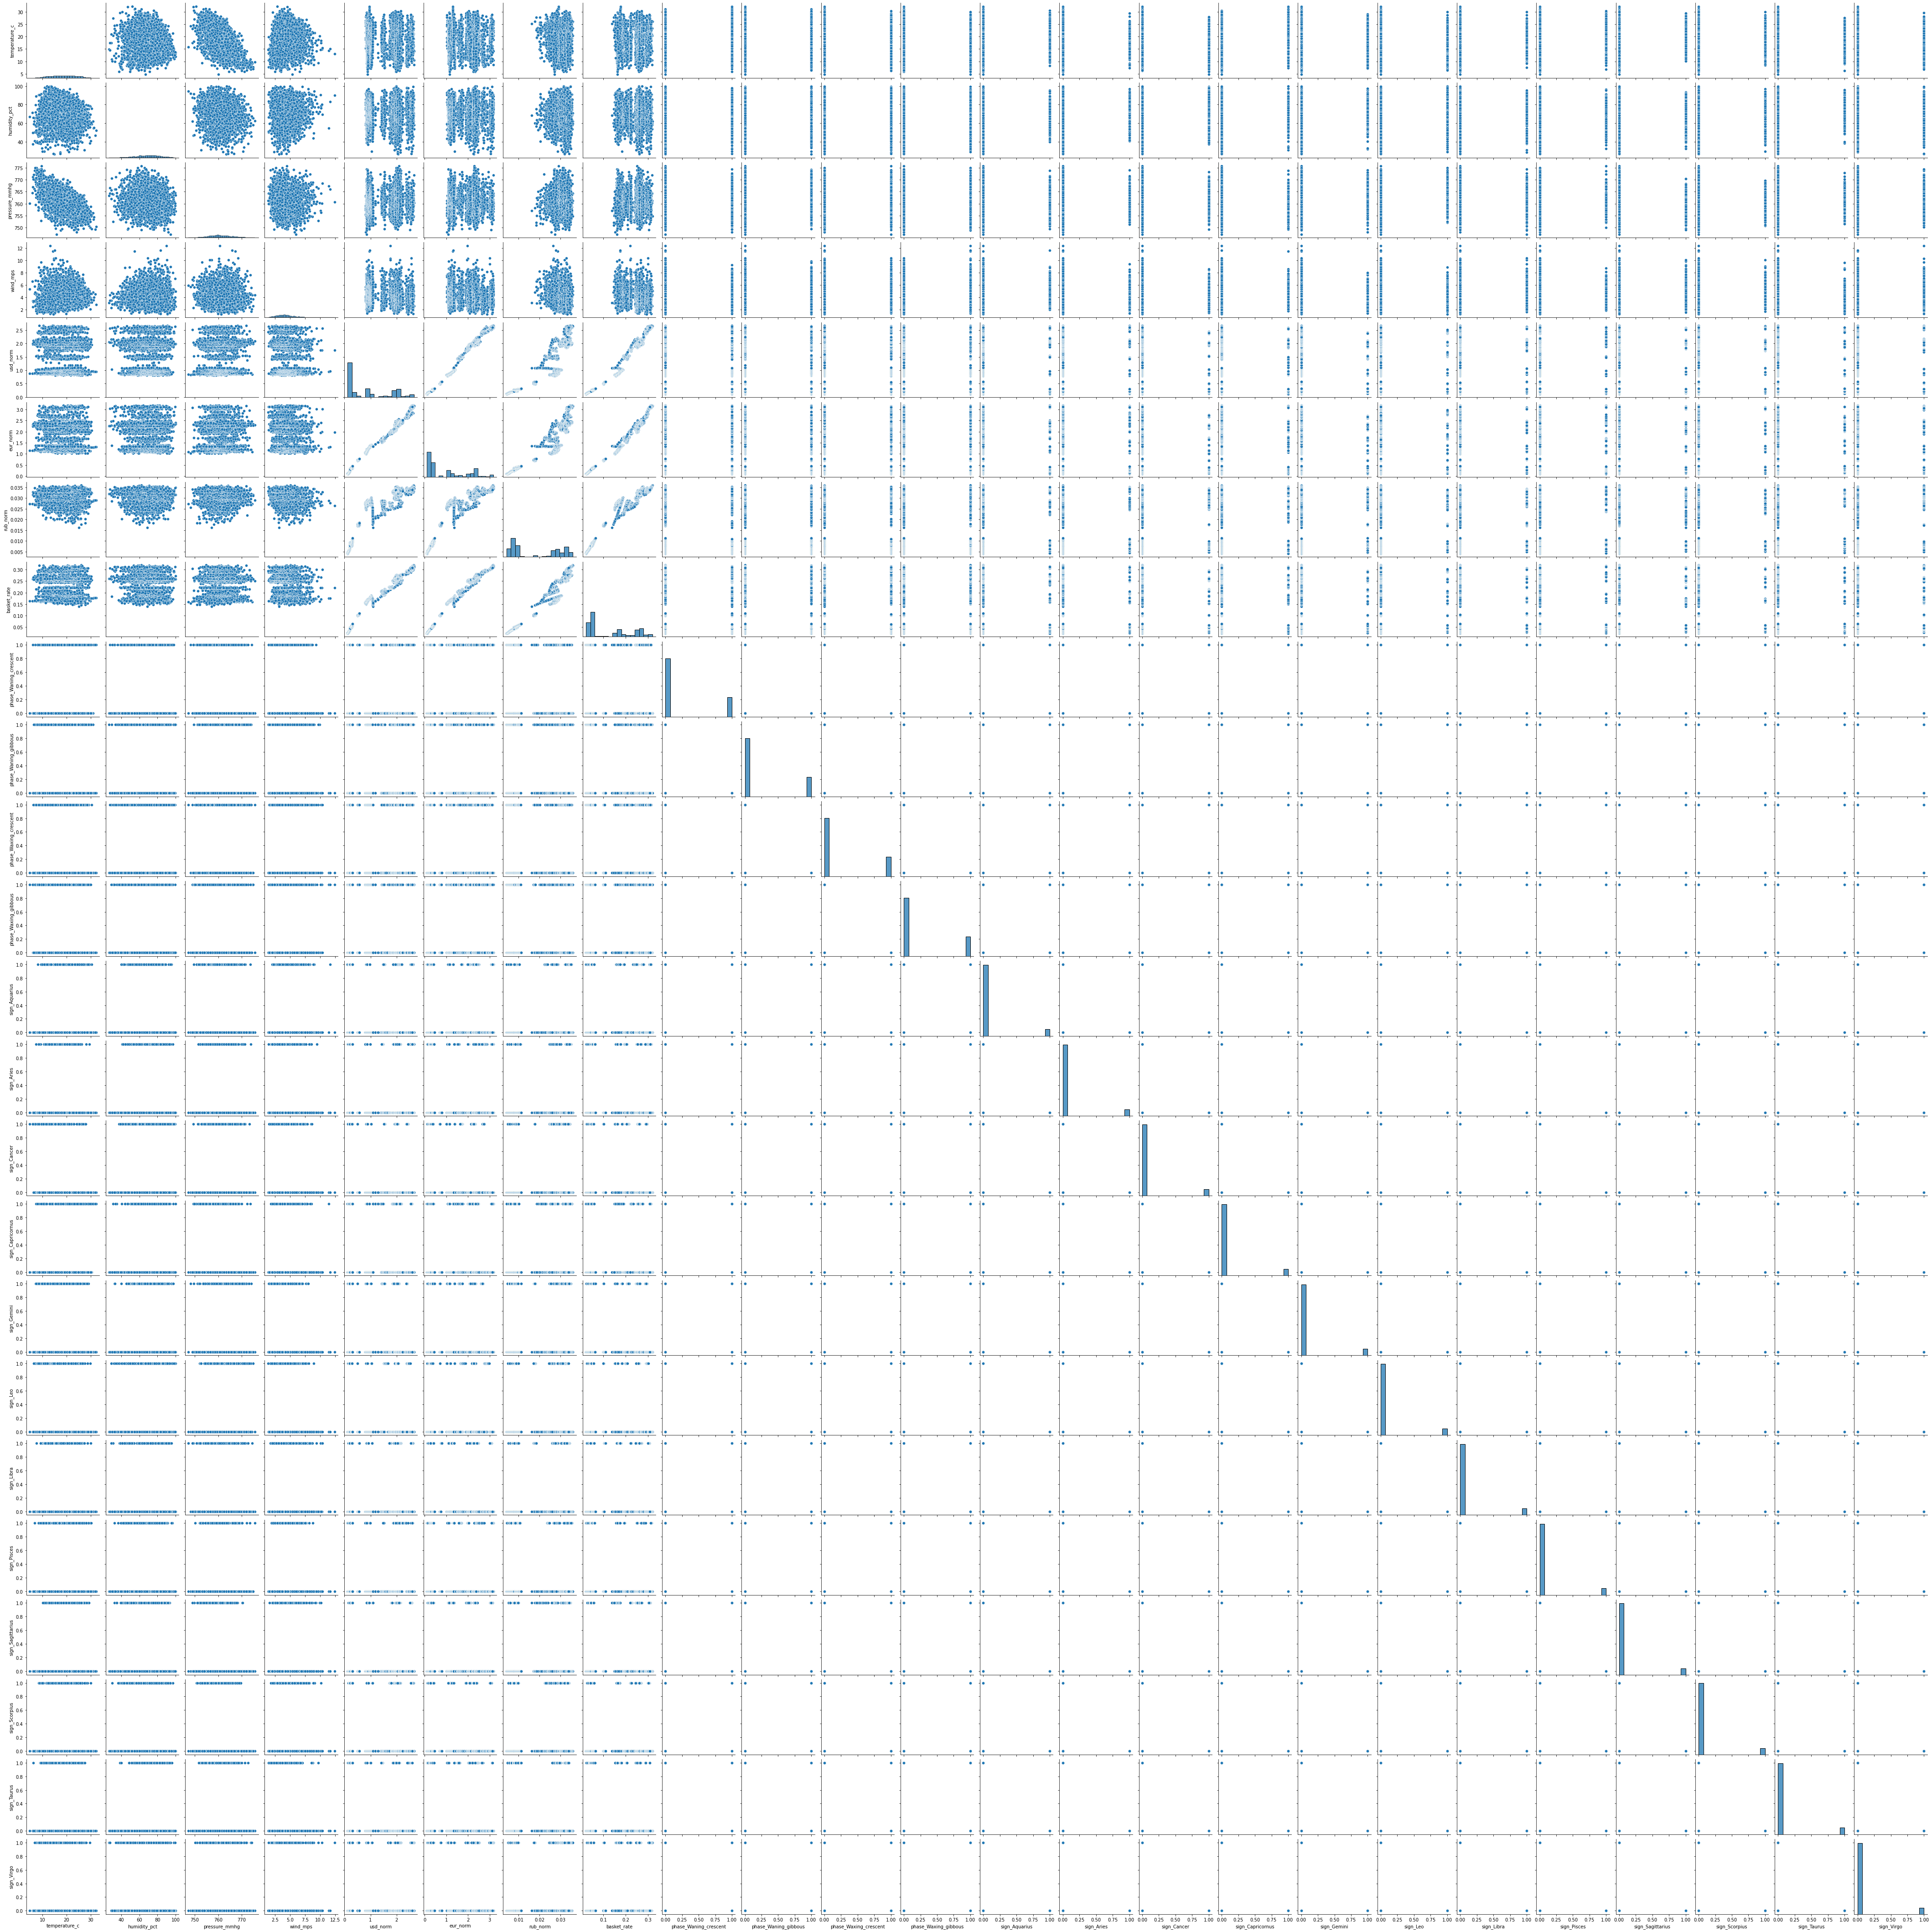

In [32]:
# pairplot with zodiac and moon one-hot-encoded
pairplot_dummies = pairplot(mutual_dummies)
pairplot_dummies;

In [33]:
# correlation heatmap with zodiac and moon one-hot-encoded 

corrs = mutual_dummies.corr()

figure = ff.create_annotated_heatmap(
    z=corrs.values,
    x=list(corrs.columns),
    y=list(corrs.index),
    colorscale='Electric',
    annotation_text=corrs.round(2).values,
    showscale=True, reversescale=True)

figure.layout.margin = dict(l=200, t=200)
figure.layout.height = 800
figure.layout.width = 1000

iplot(figure)

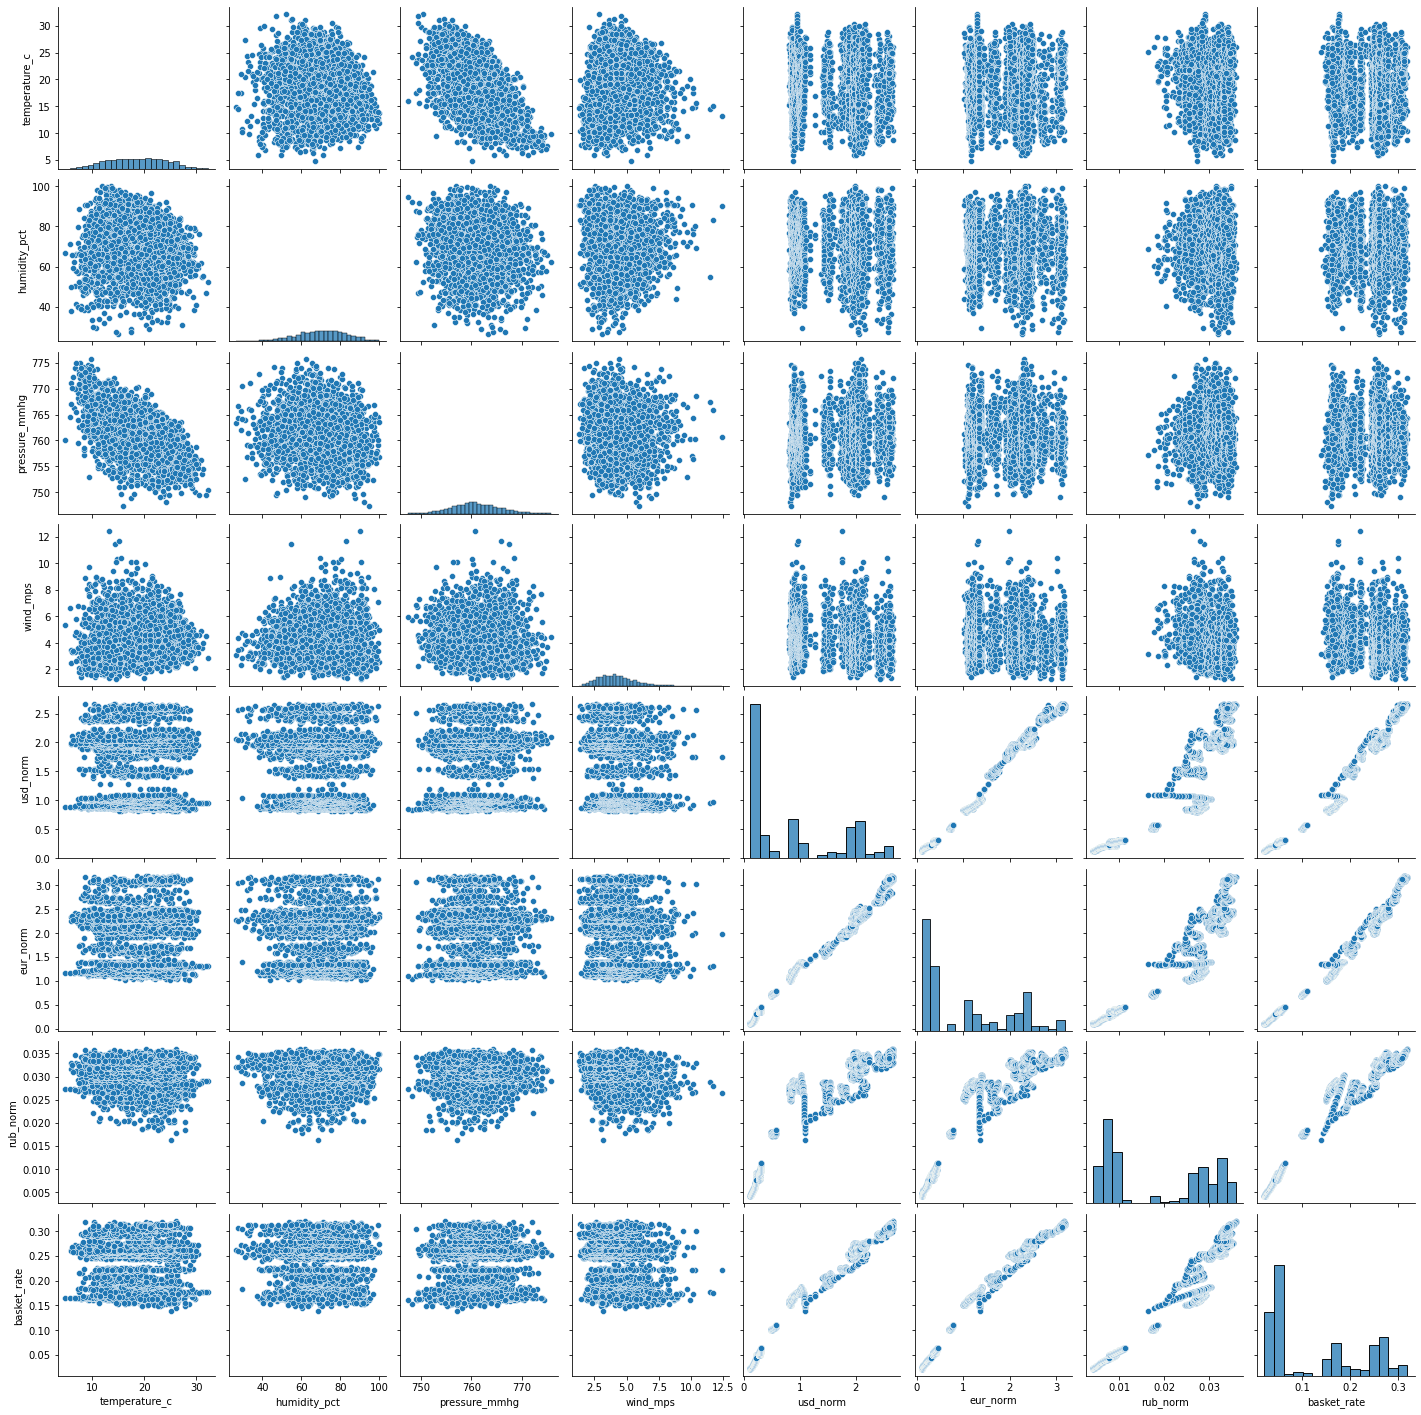

In [37]:
# pairplot without zodiac and moon

pairplot_wo_categoricals = pairplot(mutual)
pairplot_wo_categoricals;

In [38]:
# correlation heatmap without zodiac and moon

corrs = mutual.corr()

figure = ff.create_annotated_heatmap(
    z=corrs.values,
    x=list(corrs.columns),
    y=list(corrs.index),
    colorscale='Electric',
    annotation_text=corrs.round(2).values,
    showscale=True, reversescale=True)

figure.layout.margin = dict(l=200, t=200)
figure.layout.height = 800
figure.layout.width = 1000

iplot(figure)

In [39]:
# 3d plot

mutual.iplot(x='wind_mps', y='sign', z='basket_rate', kind='scatter3d', xTitle='BA wind', yTitle='Zodiac',
         zTitle='Basket Rate', theme='pearl', size=6, fontsize=4, opacity=0.6,
         categories='phase', title='3D Scatter Plot of Rate, Zodiac and Wind Speed in Buenos Aires by Moon Phase')

#### Looking for the most influencing parameters

In [40]:
# filling Nulls in weather report period (2001-2012) with seasonal (zodiac signs) group-based averages

mutual[['temperature_c', 'humidity_pct', 'pressure_mmhg', 'wind_mps']] = mutual\
            .groupby('sign').transform(lambda x: x.fillna(x.mean()))[['temperature_c', 'humidity_pct', 
                                                                      'pressure_mmhg', 'wind_mps']]

In [41]:
data_rf = pd.get_dummies(mutual)

X = data_rf.drop(columns=['usd_norm', 'eur_norm', 'rub_norm', 'basket_rate'])
y = data_rf['basket_rate']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [42]:
# Random Forest model

rf = RandomForestRegressor(n_estimators=500, n_jobs=6)

In [46]:
cross_val_score(rf, X_train, y_train, scoring='neg_root_mean_squared_error').mean()

-0.043681708646917096

In [47]:
rf.fit(X_train, y_train)

RandomForestRegressor(n_estimators=500, n_jobs=6)

In [48]:
mean_squared_error(y_test, rf.predict(X_test), squared=False)

0.04184644433513653

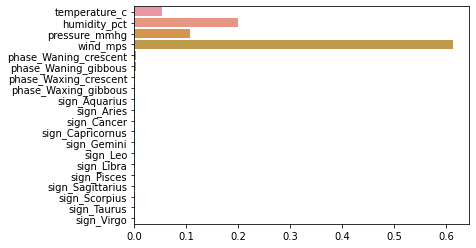

In [49]:
# plotting parameters relative influence rate on basket price

feature_importances = barplot(x=rf.feature_importances_, y=X.columns)
feature_importances;